# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')
import math

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
temps=df.temperature.sort_values()
mu, std= temps.mean(), temps.std()
r=stats.norm.pdf(temps, mu, std)
temp_bins=np.arange(temps.min(), temps.max(), step=0.1)

Based on the chart below, the data is approximately normally distributed. This assumption is supported in some more depth by using a normal test from scipy, which has a p value greater than 0.05, allowing us to provisionally accept the null hypothesis that the data is normally distributed.

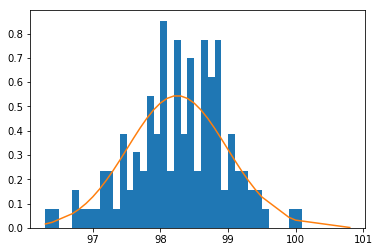

In [5]:
plt.hist(temps,bins=temp_bins, normed=True)
plt.plot(temps, r)
plt.show()

In [6]:
s,p=stats.normaltest(temps)
print("The p value is "+ str(p))

The p value is 0.258747986349


In [7]:
len(df)

130

The dataset is decently large, and as the measurements were made on an individual human, they seem to be somewhat independent. This is of course does not necessarily account for measurement error or populaton error. One would like to be sure that these temperatures were taken at the same time of day, from the same part of the body, and with the same instruments. 

H0--The true population mean is 98.6 degrees Fahrenheit.
H1--The true population mean does not equal 98.6 Fahrenheit (as we are interested in any diversion from the population mean, this is a two tailed significance test).

Since we only have a sample and we lack the standard deviation of the population, it makes sense to go with a t test, for testing this sample against the alleged true population mean. We should evaluate its significance with 95% confidence. 

A t-test is produced with the formula mu-population mean/(sd/sqrt(n))

In [8]:
tstat, pvalue=stats.ttest_1samp(temps, 98.6) #calculates the tstat and the pvalue
print(tstat,",", pvalue)

-5.45482329236 , 2.41063204156e-07


The t-stat value is evaluated on a t-table, and it exceeds 1.95, which is the test statistic for significance at >30 degrees of freedom. This is reflected in it's very low p-value. Thus, we reject the null hypothesis, and accept H1. 

In [9]:
#same test with a z-test
tm=temps.mean()
tsd=temps.std()
n=len(temps)
z=(tm-98.6)/(tsd/math.sqrt(n))
print("The z-stat is " +str(z)+ "And the p-value is less than 0.001.")

The z-stat is -5.454823292364301And the p-value is less than 0.001.


The z and t test produce largely identical results.

To compute the margin of error and the confidence interval, we will compute it at 95% confidence (hence, 1.96). Thus, the formula is the sample mean + or - the z-stat multiplied by the standard error. 

In [10]:
a=tm+(1.96*(math.sqrt((tsd/n))))
b=tm-(1.96*(math.sqrt((tsd/n))))
ci=[b,a]
print(ci)
moe=a-b
print(moe)
abnormal=[tm-(2*tsd), tm+(2*tsd)] #beyond two standard deviations is considered somewhat abnormal
print(abnormal)

[98.1020365903136, 98.39642494814792]
0.2943883578343218
[96.78286445315287, 99.71559708530866]


The confidence interval with 95% confidence is [98.1020365903136, 98.39642494814792], and the margin of error is 0.2943883578343218. The normal range is 96.78 to 99.71, calculated by multiplying out two standard deviations in each direction.

In [11]:
women=df[df.gender=="F"]
men=df[df.gender=="M"]
men.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


I will use a two sample t test to calculate if there is a significant difference between the temperatures of women and men in this dataset. My null hypothesis is that there is no difference between the temperatures of men and women, and my h1 is that there is a difference (and thus, the test is two sided). I used a t-test because I was interested in determing the likelihood that the variation between the two datasets was a function of random chance.

In [12]:
stats.ttest_ind(women.temperature, men.temperature)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

The t stat is 2.285, and it has a p-value of .0239, suggesting that there is a significant difference between male and female body temperatures. 